In [16]:
import pandas as pd
import numpy as np

df_uts= pd.read_csv(r'C:\Users\bravo\Downloads\Documents\test\Dataset UTS_Gasal 2425.csv')
df_uts.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [17]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

print("\nPengecekan nilai missing values (null, kosong, NaN):")
missing_values = df_uts.isnull().sum()
empty_strings = (df_uts == '').sum()
nan_values = df_uts.isna().sum()

print("\nMissing values per column:\n", missing_values)
print("\nKolom dengan string kosong:\n", empty_strings)
print("\nNaN values per column:\n", nan_values)

print("\nPengecekan outlier menggunakan metode IQR:")
df_uts_numeric = df_uts.select_dtypes(include=['number']) 

Q1 = df_uts_numeric.quantile(0.25)
Q3 = df_uts_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_uts_numeric < (Q1 - 1.5 * IQR)) | (df_uts_numeric > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier per column:\n", outliers)

duplicates = df_uts.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")

categorical_columns = df_uts.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_uts[col] = le.fit_transform(df_uts[col].astype(str)) 
    label_encoders[col] = le

print("\nData setelah diubah menjadi numerik:\n", df_uts.head())

target = 'price'
class_distribution = df_uts[target].value_counts()
print("\nDistribusi kelas:\n", class_distribution)

X = df_uts.drop(columns=[target])
y = df_uts[target]

kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}: {len(train_index)} data latih, {len(test_index)} data uji")
target = 'price' 

features_to_drop = ['category']

X = df_uts.drop(columns=features_to_drop)
y = df_uts[target]

print("\nFitur (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

print("\nFitur (X) setelah penghapusan kolom Kategori:\n", X.head())
print("\nTarget (y):\n", y.head())

kf = KFold(n_splits=5)

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"\nFold {fold + 1}: {len(train_index)} data latih, {len(test_index)} data uji")


Pengecekan nilai missing values (null, kosong, NaN):

Missing values per column:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Kolom dengan string kosong:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

NaN values per column:
 squareme

In [18]:
df_uts2 = X.copy()
df_uts2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price
0,75523,3,0,1,63,9373,3,8,2005,1,1,4313,9005,956,0,7,7559081.5
1,55712,58,0,1,19,34457,6,8,2021,1,0,2937,8852,135,1,9,5574642.1
2,86929,100,1,0,11,98155,3,4,2003,0,0,6326,4748,654,0,10,8696869.3
3,51522,3,0,0,61,9047,8,3,2012,0,1,632,5792,807,1,5,5154055.2
4,96470,74,1,0,21,92029,4,2,2011,0,1,5414,1172,716,1,9,9652258.1
5,79770,3,0,1,69,54812,10,5,2018,1,1,8871,7117,240,0,7,7986665.8
6,75985,60,1,0,67,6517,6,9,2009,0,1,4878,281,384,1,5,7607322.9
7,64169,88,0,1,6,61711,3,9,2011,0,1,3054,129,726,0,9,6420823.1
8,92383,12,0,0,78,71982,3,7,2000,1,0,7507,9056,892,1,1,9244344.0
9,95121,46,0,1,3,9382,7,9,1994,1,0,615,1221,328,0,10,9515440.4


In [19]:
from sklearn.model_selection import train_test_split

def train_test_split_custom(X, y, test_size, random_state=99):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    print(f"\nTrain-test split dengan rasio {int((1 - test_size) * 100)}:{int(test_size * 100)}")
    print(f"Jumlah data latih: {len(X_train)}")
    print(f"Jumlah data uji: {len(X_test)}\n")

    return X_train, X_test, y_train, y_test

split_ratios = [0.2, 0.25, 0.3]

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=ratio, random_state=99)


Train-test split dengan rasio 80:20
Jumlah data latih: 8000
Jumlah data uji: 2000


Train-test split dengan rasio 75:25
Jumlah data latih: 7500
Jumlah data uji: 2500


Train-test split dengan rasio 70:30
Jumlah data latih: 7000
Jumlah data uji: 3000



In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Pipeline with StandardScaler and MinMaxScaler
pipe_Ridge = Pipeline(steps=[
    ('scalers', FeatureUnion(transformer_list=[
        ('standard_scaler', StandardScaler()),
        ('minmax_scaler', MinMaxScaler())
    ])),
    ('feature_selection', 'passthrough'),  # Placeholder for the feature selection method
    ('reg', Ridge())  # Ridge regressor
])

# Parameter grid for SelectKBest and SelectPercentile
param_grid_Ridge = [
    {
        'feature_selection': [SelectKBest(score_func=f_regression)],
        'feature_selection__k': np.arange(1, 20),  # Number of features for SelectKBest
        'reg__alpha': [0.01, 0.1, 1, 10, 100]  # Ridge regression regularization parameter
    },
    {
        'feature_selection': [SelectPercentile(score_func=f_regression)],
        'feature_selection__percentile': np.arange(10, 101, 10),  # Percentage of features for SelectPercentile
        'reg__alpha': [0.01, 0.1, 1, 10, 100]  # Ridge regression regularization parameter
    }
]

# GridSearchCV to find the best model
GSCV_Ridge = GridSearchCV(pipe_Ridge, param_grid_Ridge, cv=5, scoring='neg_mean_squared_error')

# Fit the model
GSCV_Ridge.fit(X_train, y_train)

# Output the best model and its performance
print("Best model: {}".format(GSCV_Ridge.best_estimator_))
print("Ridge best parameters: {}".format(GSCV_Ridge.best_params_))
print("Coefficients: {}".format(GSCV_Ridge.best_estimator_.named_steps['reg'].coef_))
print("Intercept: {}".format(GSCV_Ridge.best_estimator_.named_steps['reg'].intercept_))

# Predictions on the test data
Ridge_predict = GSCV_Ridge.predict(X_test)

# Evaluate model performance
mse_Ridge = mean_squared_error(y_test, Ridge_predict)
mae_Ridge = mean_absolute_error(y_test, Ridge_predict)

print("Ridge Mean Squared Error (MSE): {}".format(mse_Ridge))
print("Ridge Mean Absolute Error (MAE): {}".format(mae_Ridge))
print("Ridge Root Mean Squared Error: {}".format(np.sqrt(mse_Ridge)))



Best model: Pipeline(steps=[('scalers',
                 FeatureUnion(transformer_list=[('standard_scaler',
                                                 StandardScaler()),
                                                ('minmax_scaler',
                                                 MinMaxScaler())])),
                ('feature_selection',
                 SelectPercentile(percentile=100,
                                  score_func=<function f_regression at 0x000001EE677507C0>)),
                ('reg', Ridge(alpha=0.01))])
Ridge best parameters: {'feature_selection': SelectPercentile(score_func=<function f_regression at 0x000001EE677507C0>), 'feature_selection__percentile': 100, 'reg__alpha': 0.01}
Coefficients: [ 1.14611076e+06  1.50211883e+01  5.15207713e+02  5.10810845e+02
  6.19092634e+02 -4.74396882e+00  5.47356789e+01 -1.14005731e+01
 -1.68699864e+01 -2.75559355e+01  2.30774959e+01  4.30798037e+00
 -4.27917301e+00  8.67927928e+00  2.25963223e+00 -3.57244194e+00
  1.52214

In [22]:
df_results = pd.DataFrame(y_test, columns=['price'])
df_results = pd.DataFrame(y_test)
df_results['Ridge Prediction'] = Ridge_predict

df_results['Selisih_RR'] = df_results['Ridge Prediction'] - df_results['price']

df_results.head()

,price,Ridge Prediction,Selisih_RR
7653,2696414.4,2.696407e+06,-7.053336
7865,4919606.6,4.920987e+06,1380.189639
3226,8974887.0,8.974570e+06,-316.678624
5912,923577.4,9.238598e+05,282.422501
8237,2474395.5,2.476061e+06,1665.545285


In [23]:
df_results.describe()

,price,Ridge Prediction,Selisih_RR
count,3.000000e+03,3.000000e+03,3000.000000
mean,4.992964e+06,4.992935e+06,-28.976968
std,2.843994e+06,2.843963e+06,811.065287
min,1.322910e+04,1.326441e+04,-3037.642622
25%,2.625738e+06,2.624536e+06,-568.734546
50%,5.012312e+06,5.011805e+06,-17.116687
75%,7.440587e+06,7.440375e+06,503.334347
max,9.994093e+06,9.994162e+06,2968.842191


In [24]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Pipeline with StandardScaler and MinMaxScaler
pipe_SVR = Pipeline(steps=[
    ('scalers', FeatureUnion(transformer_list=[
        ('standard_scaler', StandardScaler()),
        ('minmax_scaler', MinMaxScaler())
    ])),
    ('feature_selection', 'passthrough'),  # Placeholder for the feature selection method
    ('reg', SVR())  # Support Vector Regressor
])

# Parameter grid for SelectKBest and SelectPercentile with SVR
param_grid_SVR = [
    {
        'feature_selection': [SelectKBest(score_func=f_regression)],
        'feature_selection__k': np.arange(1, 20),  # Number of features for SelectKBest
        'reg__kernel': ['linear', 'rbf'],  # Kernel types for SVR
        'reg__C': [0.1, 1, 10, 100],  # Regularization parameter for SVR
        'reg__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
    },
    {
        'feature_selection': [SelectPercentile(score_func=f_regression)],
        'feature_selection__percentile': np.arange(10, 101, 10),  # Percentage of features for SelectPercentile
        'reg__kernel': ['linear', 'rbf'],  # Kernel types for SVR
        'reg__C': [0.1, 1, 10, 100],  # Regularization parameter for SVR
        'reg__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
    }
]

# GridSearchCV to find the best model
GSCV_SVR = GridSearchCV(pipe_SVR, param_grid_SVR, cv=5, scoring='neg_mean_squared_error')

# Fit the model
GSCV_SVR.fit(X_train, y_train)

# Output the best model and its performance
print("Best model: {}".format(GSCV_SVR.best_estimator_))
print("SVR best parameters: {}".format(GSCV_SVR.best_params_))

# Predictions on the test data
SVR_predict = GSCV_SVR.predict(X_test)

# Evaluate model performance
mse_SVR = mean_squared_error(y_test, SVR_predict)
mae_SVR = mean_absolute_error(y_test, SVR_predict)

print("SVR Mean Squared Error (MSE): {}".format(mse_SVR))
print("SVR Mean Absolute Error (MAE): {}".format(mae_SVR))
print("SVR Root Mean Squared Error: {}".format(np.sqrt(mse_SVR)))


Best model: Pipeline(steps=[('scalers',
                 FeatureUnion(transformer_list=[('standard_scaler',
                                                 StandardScaler()),
                                                ('minmax_scaler',
                                                 MinMaxScaler())])),
                ('feature_selection',
                 SelectPercentile(percentile=100,
                                  score_func=<function f_regression at 0x000001EE677507C0>)),
                ('reg', SVR(C=100, kernel='linear'))])
SVR best parameters: {'feature_selection': SelectPercentile(score_func=<function f_regression at 0x000001EE677507C0>), 'feature_selection__percentile': 100, 'reg__C': 100, 'reg__gamma': 'scale', 'reg__kernel': 'linear'}
SVR Mean Squared Error (MSE): 2409690728666.333
SVR Mean Absolute Error (MAE): 1331891.2948321374
SVR Root Mean Squared Error: 1552317.856840645


In [25]:
df_results['SVR Prediction'] = SVR_predict
df_results = pd.DataFrame(y_test)
df_results['SVR Prediction'] = SVR_predict

df_results['Selisih_price_LR'] = df_results['SVR Prediction'] - df_results['price']
df_results.head()

,price,SVR Prediction,Selisih_price_LR
7653,2696414.4,4.007229e+06,1.310814e+06
7865,4919606.6,4.921303e+06,1.696215e+03
3226,8974887.0,6.788677e+06,-2.186210e+06
5912,923577.4,3.150683e+06,2.227106e+06
8237,2474395.5,3.890904e+06,1.416509e+06


In [26]:
df_results.describe()

,price,SVR Prediction,Selisih_price_LR
count,3.000000e+03,3.000000e+03,3.000000e+03
mean,4.992964e+06,5.002111e+06,9.147090e+03
std,2.843994e+06,1.291977e+06,1.552550e+06
min,1.322910e+04,2.712058e+06,-2.750518e+06
25%,2.625738e+06,3.917340e+06,-1.329096e+06
50%,5.012312e+06,5.008315e+06,2.025259e+03
75%,7.440587e+06,6.118946e+06,1.306285e+06
max,9.994093e+06,7.317175e+06,2.759431e+06


In [28]:
import pandas as pd

df_results = pd.DataFrame({
    'Price': y_test,
    'Ridge Prediction': Ridge_predict,
    'SVR Prediction': SVR_predict
})

df_results['Ridge Difference'] = df_results['Ridge Prediction'] - df_results['Price']
df_results['SVR Difference'] = df_results['SVR Prediction'] - df_results['Price']

print(df_results.head())

          Price  Ridge Prediction  SVR Prediction  Ridge Difference  \
7653  2696414.4      2.696407e+06    4.007229e+06         -7.053336   
7865  4919606.6      4.920987e+06    4.921303e+06       1380.189639   
3226  8974887.0      8.974570e+06    6.788677e+06       -316.678624   
5912   923577.4      9.238598e+05    3.150683e+06        282.422501   
8237  2474395.5      2.476061e+06    3.890904e+06       1665.545285   

      SVR Difference  
7653    1.310814e+06  
7865    1.696215e+03  
3226   -2.186210e+06  
5912    2.227106e+06  
8237    1.416509e+06  


In [35]:
ridge_feature_count = np.sum(GSCV_Ridge.best_estimator_.named_steps['feature_selection'].get_support())
svr_feature_count = np.sum(GSCV_SVR.best_estimator_.named_steps['feature_selection'].get_support())

performance_comparison = {
    'Model': ['Ridge', 'SVR'],
    'Mean Absolute Error (MAE)': [mae_Ridge, mae_SVR],
    'Mean Squared Error (MSE)': [mse_Ridge, mse_SVR],
    'Root Mean Squared Error (RMSE)': [np.sqrt(mse_Ridge), np.sqrt(mse_SVR)],
    'Number of Features': [ridge_feature_count, svr_feature_count]
}

df_performance = pd.DataFrame(performance_comparison)

print(df_performance)

   Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0  Ridge               6.385104e+02              6.584473e+05   
1    SVR               1.331891e+06              2.409691e+12   

   Root Mean Squared Error (RMSE)  Number of Features  
0                    8.114476e+02                  34  
1                    1.552318e+06                  34  


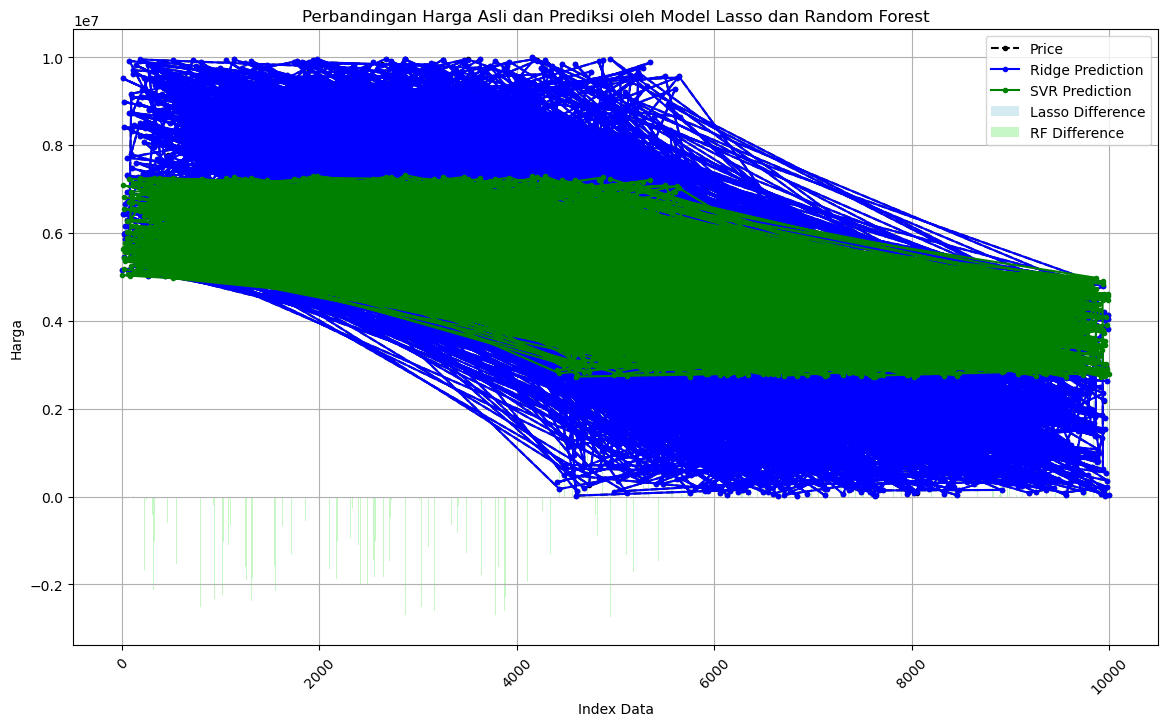

In [38]:
import matplotlib.pyplot as plt

df_results.set_index(df_results.index, inplace=True)

plt.figure(figsize=(14, 8))

plt.plot(df_results['Price'], label='Price', color='black', linestyle='--', marker='o', markersize=3)

plt.plot(df_results['Ridge Prediction'], label='Ridge Prediction', color='blue', linestyle='-', marker='o', markersize=3)

plt.plot(df_results['SVR Prediction'], label='SVR Prediction', color='green', linestyle='-', marker='o', markersize=3)

plt.bar(df_results.index, df_results['Ridge Difference'], color='lightblue', alpha=0.5, label='Lasso Difference', width=0.4)
plt.bar(df_results.index + 0.4, df_results['SVR Difference'], color='lightgreen', alpha=0.5, label='RF Difference', width=0.4)

plt.title('Perbandingan Harga Asli dan Prediksi oleh Model Lasso dan Random Forest')
plt.xlabel('Index Data')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

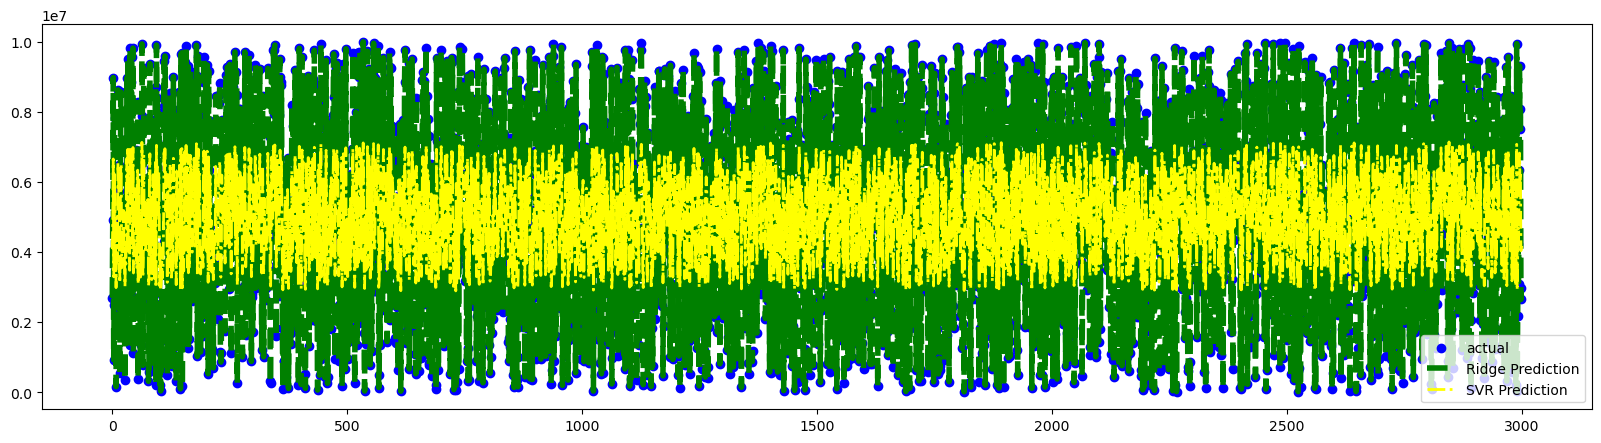

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
data_len = range(len(y_test))
plt.scatter(data_len, df_results.price, label="actual", color="blue")
plt.plot(data_len, df_results['Ridge Prediction'], label="Ridge Prediction", color="green", linewidth=4, linestyle="dashed")
plt.plot(data_len, df_results['SVR Prediction'], label="SVR Prediction", color="yellow", linewidth=2, linestyle="-.")
plt.legend()
plt.show

In [39]:
import pickle

best_model = GSCV_Ridge.best_estimator_

with open('BestModel_REG_Ridge_Bokeh.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model Terbaik Berhasil Disimpan ke 'BestModel_REG_Ridge_Bokeh.pkl")

Model Terbaik Berhasil Disimpan ke 'BestModel_REG_Ridge_Bokeh.pkl
